In [1]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("fruits_nuts", {}, "./data/trainval.json", "./data/images")


In [2]:
import detectron2
print(detectron2.__path__)

['/home/solomon/.local/lib/python3.6/site-packages/detectron2']


In [3]:
from torch.utils.tensorboard import SummaryWriter
from detectron2.data import DatasetCatalog, MetadataCatalog,Metadata
fruits_nuts_metadata = MetadataCatalog.get("fruits_nuts")
Metadata(evaluator_type='coco', image_root='./data/images', json_file='./data/trainval.json', name='fruits_nuts',
         thing_classes=['date', 'fig', 'hazelnut'], thing_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2})
dataset_dicts = DatasetCatalog.get("fruits_nuts")

In [4]:
Metadata(evaluator_type='coco', image_root='./data/images', json_file='./data/trainval.json', name='fruits_nuts',
         thing_classes=['date', 'fig', 'hazelnut'], thing_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2})


namespace(evaluator_type='coco',
          image_root='./data/images',
          json_file='./data/trainval.json',
          name='fruits_nuts',
          thing_classes=['date', 'fig', 'hazelnut'],
          thing_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2})

number of images= 18


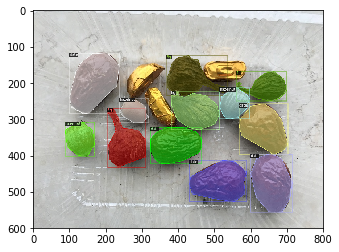

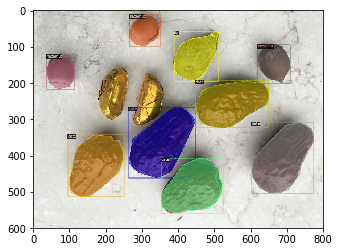

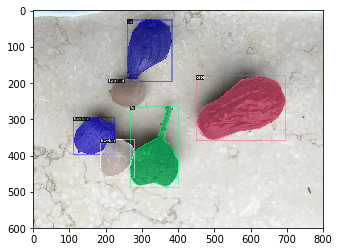

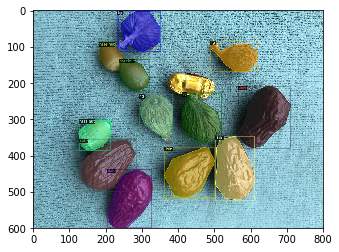

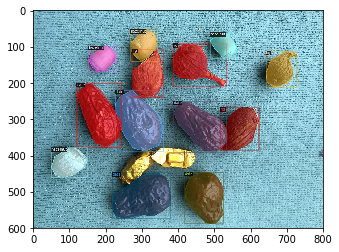

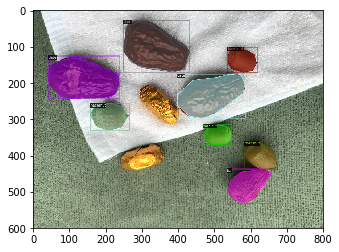

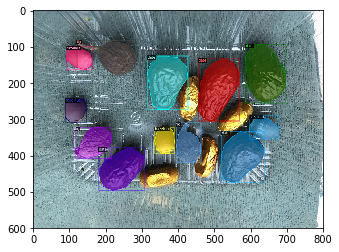

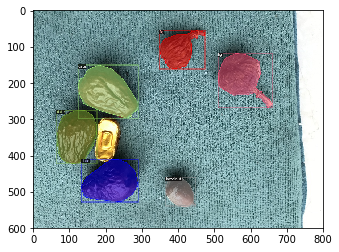

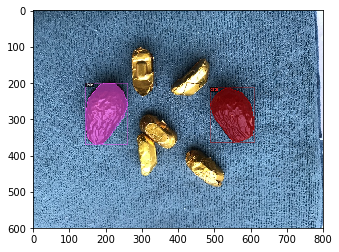

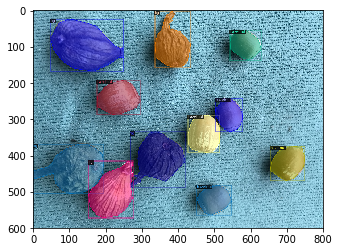

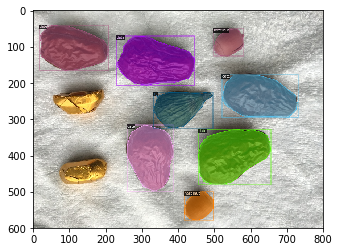

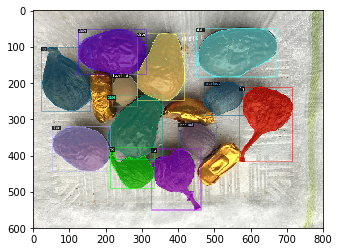

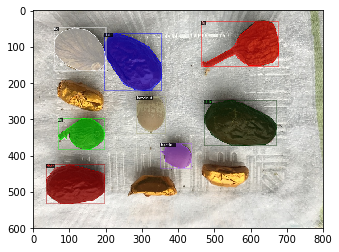

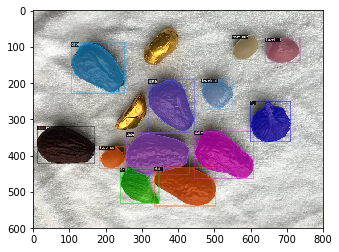

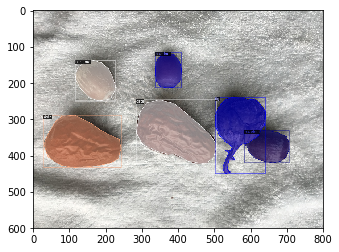

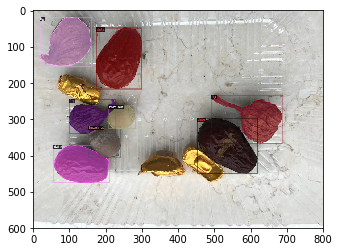

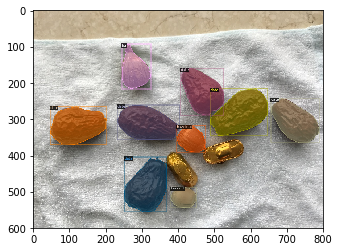

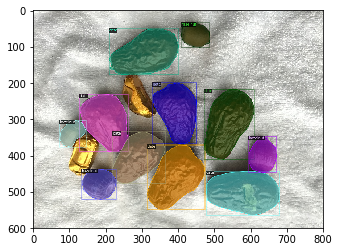

In [5]:
import random
import cv2
from detectron2.utils.visualizer import Visualizer
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print("number of images=",len(dataset_dicts))
for d in dataset_dicts:#random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=fruits_nuts_metadata, scale=1)
    vis = visualizer.draw_dataset_dict(d) 
    plt.imshow(vis.get_image())
    plt.show() 

In [32]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os
#"./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
cfg = get_cfg()
cfg.merge_from_file(
    "/DATA/LOC/FacebookAI/detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)
cfg.DATASETS.TRAIN = ("fruits_nuts",)
cfg.DATASETS.TEST = ()  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")#"detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = (
    300
)  # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = (
    128
)  # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # 3 classes (data, fig, hazelnut)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[02/25 09:57:44 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[02/25 09:57:44 d2.data.datasets.coco]: Loaded 18 images in COCO format from ./data/trainval.json
[02/25 09:57:44 d2.data.build]: Removed 0 images with no usable annotations. 18 images left.
[02/25 09:57:44 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[02/25 09:57:44 d2.data.build]: Using training sampler TrainingSampler
[02/25 09:57:44 d2.data.common]: Serializing 18 elements to byte tensors and concatenating them all ...
[02/25 09:57:44 d2.data.common]: Serialized dataset takes 0.06 MiB
[02/25 09:57:44 d2.engine.train_loop]: Starting training from iteration 0
[02/25 09:57:54 d2.utils.events]:  eta: 0:02:17  iter: 19  total_loss: 0.2756  loss_cls: 0.06404  loss_box_reg: 0.1386  loss_mask: 0.04612  loss_rpn_cls: 0.001702  loss_rpn_loc: 0.01546  time: 0.4867  data_time: 0.0072  lr: 0.00039962  max_mem: 2519M
[02/25 09:58:03 d2.utils.event

In [19]:
cfg.OUTPUT_DIR

'./output'

In [27]:
%load_ext tensorboard
%tensorboard --logdir output


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 31046), started 1:16:12 ago. (Use '!kill 31046' to kill it.)

In [14]:
%reload_ext tensorboard

In [29]:
from detectron2.engine import DefaultPredictor
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("fruits_nuts", )
predictor = DefaultPredictor(cfg)

---


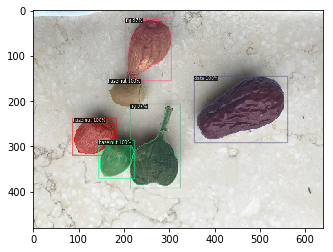

---


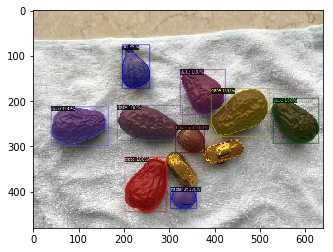

---


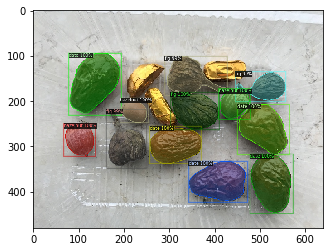

In [31]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=fruits_nuts_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    print("---")
    plt.imshow(v.get_image())
    plt.show()  